In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('matala2_cosmetics_2019-Nov.csv')

C:\Users\ronik\AppData\Local\Temp\ipykernel_18096\2858935832.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('matala2_cosmetics_2019-Nov.csv')


#Q1

In [3]:
#changing my event time to datetime
data['event_time'] = pd.to_datetime(data['event_time'], infer_datetime_format=True)

In [4]:
#sorting my values
data=data.sort_values(['user_id',"user_session","event_time"])

In [6]:
data['duration_to_next_event'] = data.groupby('user_session')['event_time'].apply(lambda x: ((x.shift(-1)-x)).fillna(pd.Timedelta(seconds=0)))
data['duration_to_next_event'] = data['duration_to_next_event'].apply(lambda x: x.total_seconds())

#Q2

In [7]:
#sorting my values
data=data.sort_values(['user_id',"event_time"])

In [8]:
data['number']=data.groupby('user_id')['event_time'].diff().fillna(pd.Timedelta(seconds=0))
data['funnel']=data['number']>pd.Timedelta(days=5)
data['funnel_number']=data.groupby('user_id')['funnel'].cumsum()+1
data=data.drop(['number', 'funnel'], axis=1)

#Q3

In [9]:
data['index']=data.groupby(['user_id','user_session','funnel_number'])['user_session'].apply(lambda x: x.shift(1)!=x).astype(int)

In [10]:
#sorting my values
data=data.sort_values(['user_id','user_session'])

In [11]:
data['index_in_funnel']=data.groupby(['user_id','funnel_number'])['index'].cumsum()

In [12]:
#dropping my column
data=data.drop(['index'], axis=1)

In [13]:
#sorting my values
data=data.sort_values(['user_id','funnel_number','index_in_funnel'])

#Q4

In [14]:
def check(val):
    num=re.findall('[0-9]+\.[0-9]*',val)
    conv=float(num[0])
    return conv

In [15]:
data['price']=data['price'].astype('str')

In [16]:
data['price'] =data['price'].apply(check)

#Q5

<AxesSubplot:xlabel='event_type', ylabel='count'>

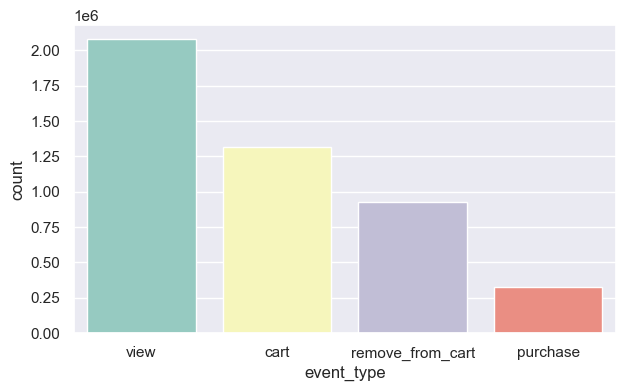

In [17]:
sns.set(style='darkgrid')
plt.figure(figsize=(7,4)) 
sns.countplot(x="event_type", palette="Set3",data=data,order = data['event_type'].value_counts().index)

#Q6

In [22]:
events_num=data.groupby('user_id')['user_session'].value_counts()

In [23]:
time=data.groupby(['user_id','user_session'])['duration_to_next_event'].sum()

In [24]:
funnel=data.groupby(['user_id','user_session'])['funnel_number'].max()

In [25]:
index=data.groupby(['user_id','user_session'])['index_in_funnel'].max()

In [26]:
view=data[data.loc[:,'event_type']=='view']
view_list=view.groupby(['user_id','user_session'])['product_id'].apply(list)

In [27]:
cart=data[data.loc[:,'event_type']=='cart']
cart_list=cart.groupby(['user_id','user_session'])['product_id'].apply(list)

In [28]:
purchase=data[data.loc[:,'event_type']=='purchase']
purchased_list=purchase.groupby(['user_id','user_session'])['product_id'].apply(list)

In [35]:
df={'num_of_events':events_num,'funnel_number':funnel, 'index_in_funnel': index, 'session_time': time, 'list_of_viewed': view_list,'list_of_added_to_cart': cart_list,'list_of_purchased': purchased_list}

In [36]:
session_data=pd.DataFrame(df).reset_index()